In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import os

In [2]:
def img_to_df(path, label):
    """
    read the images in the given path and label with the given label returning a dataframe

    Parameters:
    path (str): path to the images
    label (str): label for the images

    Returns:
    df (pandas.DataFrame): dataframe with the images and the label
    """
    df = pd.DataFrame(columns=['image', 'label'])
    for img_name in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_name))
        df = df.append({'image': img[:,:,0], 'label': label}, ignore_index=True)
    return df    

In [3]:
train_angry = img_to_df('images/images/train/angry', 'angry')
train_disgust = img_to_df('images/images/train/disgust', 'disgust')
train_fear = img_to_df('images/images/train/fear', 'fear')
train_happy = img_to_df('images/images/train/happy', 'happy')
train_neutral = img_to_df('images/images/train/neutral', 'neutral')
train_sad = img_to_df('images/images/train/sad', 'sad')
train_surprise = img_to_df('images/images/train/surprise', 'surprise')

# join all the training data
train_df = pd.concat([train_angry, train_disgust, train_fear, train_happy, train_neutral, train_sad, train_surprise])


In [4]:
print(f'Train data contains {train_df.shape[0]} images')

Train data contains 28821 images


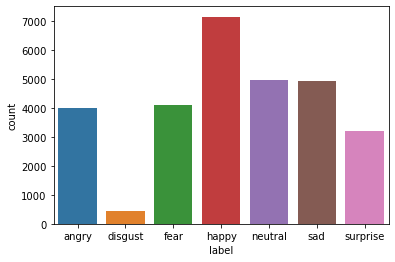

In [5]:
# plot the distribution of the labels for the training data
sns.countplot(train_df['label']);



In [6]:
# validation data
valid_angry = img_to_df('images/images/validation/angry', 'angry')
valid_disgust = img_to_df('images/images/validation/disgust', 'disgust')
valid_fear = img_to_df('images/images/validation/fear', 'fear')
valid_happy = img_to_df('images/images/validation/happy', 'happy')
valid_neutral = img_to_df('images/images/validation/neutral', 'neutral')
valid_sad = img_to_df('images/images/validation/sad', 'sad')
valid_surprise = img_to_df('images/images/validation/surprise', 'surprise')

# all the validation data
valid_df = pd.concat([valid_angry, valid_disgust, valid_fear, valid_happy, valid_neutral, valid_sad, valid_surprise])

In [7]:
print(f'Validation data contains {valid_df.shape[0]} images')

Validation data contains 7066 images


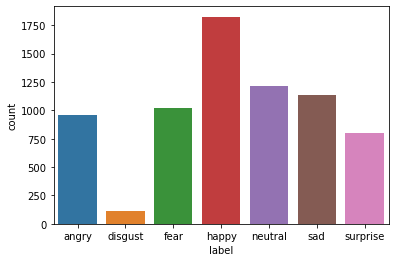

In [8]:
# plot the distribution of the labels for the validation data
sns.countplot(valid_df['label']);


In [9]:
all_imgs_df = pd.concat([train_df, valid_df])

In [12]:
print(f'The data contains {all_imgs_df.shape[0]} images')

The data contains 35887 images


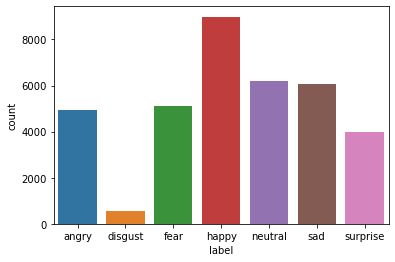

In [10]:
# plot the distribution of the labels for all the data
sns.countplot(all_imgs_df['label']);

In [11]:
# save the dataframe as a csv file
all_imgs_df.to_csv('./data/all_imgs_df.csv')
train_df.to_csv('./data/train_df.csv')
valid_df.to_csv('./data/valid_df.csv')